In [34]:
from GestionImages import clean_imagies, search_images

from fastai.vision.all import *

In [24]:

path = 'assets'
clean_imagies(pattern_tuple=('bird','forest'),parent_path=path)
#path = 'bird_or_not'



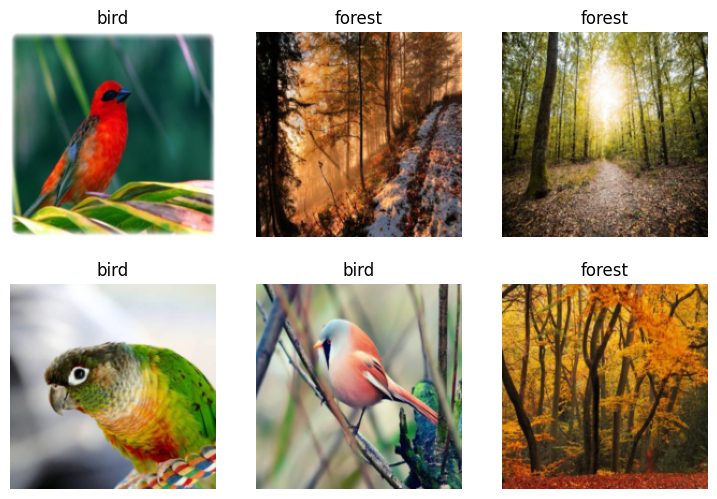

In [29]:
# affiche le type d'image, ceci n'est pas une prediction
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=10)

dls.show_batch(max_n=6)

In [31]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

epoch,train_loss,valid_loss,error_rate,time
0,1.563571,1.111834,0.333333,00:00


epoch,train_loss,valid_loss,error_rate,time
0,1.167096,0.799044,0.333333,00:00
1,0.843049,0.396675,0.333333,00:00
2,0.630327,0.146124,0.000000,00:00


In [39]:
urls = search_images('bird photos', max_images=1)
urls[0]

from fastdownload import download_url
dest = 'exam/bird_exam.jpg'
download_url(urls[0], dest, show_progress=False)

Path('exam/bird_exam.jpg')

In [40]:
is_bird,_,probs = learn.predict(PILImage.create('exam/bird_exam.jpg'))
print(f"This is a: {is_bird}.")
print(f"Probability it's a bird: {probs[0]:.4f}")

This is a: bird.
Probability it's a bird: 0.9978
